# **Problem Recommendation for Online Coding Platforms**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
problem_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/problem_data.csv')
problem_df.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [3]:
problem_df.shape

(6544, 4)

In [4]:
problem_df.columns

Index(['problem_id', 'level_type', 'points', 'tags'], dtype='object')

In [5]:
user_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/user_data.csv')
user_df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [6]:
sub_df = pd.read_csv('/content/drive/MyDrive/FoDS/Project/submissions.csv')
sub_df.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [7]:
sub_df.isnull().sum()

user_id           0
problem_id        0
attempts_range    0
dtype: int64

In [8]:
problem_df.isnull().sum()

problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64

In [9]:
temp_df = sub_df.merge(problem_df, on='problem_id')
temp_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags
0,user_232,prob_6507,1,B,1000.0,strings
1,user_2490,prob_6507,3,B,1000.0,strings
2,user_684,prob_6507,3,B,1000.0,strings
3,user_316,prob_6507,1,B,1000.0,strings
4,user_779,prob_6507,1,B,1000.0,strings


In [10]:
temp_df = temp_df.merge(user_df, on='user_id')
temp_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_232,prob_6507,1,B,1000.0,strings,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
1,user_232,prob_5071,4,A,500.0,implementation,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
2,user_232,prob_703,2,A,500.0,"brute force,implementation",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
3,user_232,prob_3935,1,C,1000.0,"greedy,sortings",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935
4,user_232,prob_164,2,A,500.0,"brute force,constructive algorithms,math",53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935


# Pre-processing

In [11]:
df = temp_df.copy()

In [12]:
df.columns

Index(['user_id', 'problem_id', 'attempts_range', 'level_type', 'points',
       'tags', 'submission_count', 'problem_solved', 'contribution', 'country',
       'follower_count', 'last_online_time_seconds', 'max_rating', 'rating',
       'rank', 'registration_time_seconds'],
      dtype='object')

In [13]:
df.shape

(155295, 16)

In [14]:
df.dtypes

user_id                       object
problem_id                    object
attempts_range                 int64
level_type                    object
points                       float64
tags                          object
submission_count               int64
problem_solved                 int64
contribution                   int64
country                       object
follower_count                 int64
last_online_time_seconds       int64
max_rating                   float64
rating                       float64
rank                          object
registration_time_seconds      int64
dtype: object

In [15]:
df.isnull().sum()

user_id                          0
problem_id                       0
attempts_range                   0
level_type                     620
points                       29075
tags                         15427
submission_count                 0
problem_solved                   0
contribution                     0
country                      37853
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
dtype: int64

In [16]:
df['country'].mode()[0], df['level_type'].mode()[0], df['tags'].mode()[0], df['points'].mode()[0]

('India', 'A', 'implementation', 500.0)

In [17]:
df['points'].mean(), df['points'].min()

(993.3023688797338, -1.0)

In [18]:
df[df['points']<0]

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
136378,user_1038,prob_5031,3,B,-1.0,NaN,928,888,45,Romania,229,1505579842,654.243,610.952,expert,1371299266


In [19]:
negative_points = df[df['points'] < 0].index
df.drop(negative_points, inplace = True)

In [20]:
df[df['points']<0]

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds


In [21]:
df['points'].mean(), df['points'].min()

(993.3102464763625, 3.0)

In [22]:
df['country'].fillna('India', inplace=True)

In [23]:
df['level_type'].fillna('A', inplace=True)

In [24]:
df['points'].fillna(500.0, inplace=True)

In [25]:
df['tags'].fillna(df['tags'].mode()[0], inplace=True)

In [26]:
df.isnull().sum()

user_id                      0
problem_id                   0
attempts_range               0
level_type                   0
points                       0
tags                         0
submission_count             0
problem_solved               0
contribution                 0
country                      0
follower_count               0
last_online_time_seconds     0
max_rating                   0
rating                       0
rank                         0
registration_time_seconds    0
dtype: int64

**Checking for Outliers**

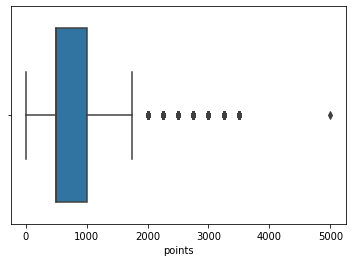

In [27]:
sns.boxplot(x=df['points']);

**Using IQR method**

In [28]:
q1 = np.percentile(df['points'], 25)
q1

500.0

In [29]:
q3 = np.percentile(df['points'], 75)
q3

1000.0

In [30]:
iqr = q3 - q1
iqr

500.0

In [31]:
cut_off = iqr*1.5
lower, upper = q1 - cut_off, q3 + cut_off
print(lower)
print(upper)

-250.0
1750.0


In [32]:
outliers = [x for x in df['points'] if (x<lower) or (x>upper)]
len(outliers)

13124

**Using 3 standard deviation method**

In [33]:
mean = df['points'].mean()
mean

900.9499787499839

In [34]:
std = df['points'].std()
std

547.1329251780865

In [35]:
cut_off = std*3
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

-740.4487967842755
2542.348754284243


In [36]:
outliers = [x for x in df['points'] if (x<lower) or (x>upper)]
len(outliers)

1045

In [37]:
df_no_outlier = df.loc[(df['points'] > lower) & (df['points'] < upper)]
df_no_outlier.shape

(154249, 16)

In [38]:
df = df_no_outlier.copy()
df.shape

(154249, 16)

# Visualization

Text(0.5, 1.0, 'Most problem levels')

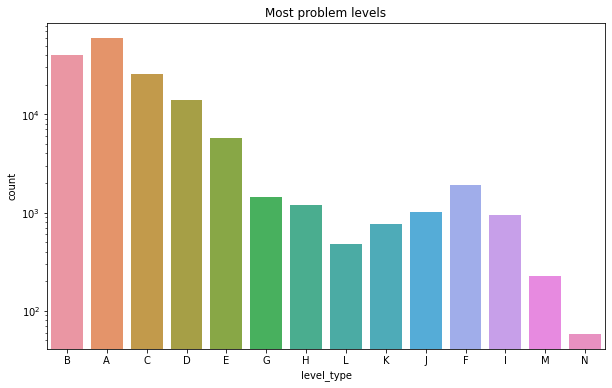

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(df['level_type'])
plt.yscale("log")
plt.title('Most problem levels')

In [40]:
level_type_df = df.groupby('level_type').sum().reset_index().sort_values(by='problem_solved', ascending=False)
level_type_df.head()

,level_type,attempts_range,points,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds
0,A,92715,30220542.0,17040281,15147962,176244,2251119,90703216117036,2.263337e+07,1.982560e+07,86611971566494
1,B,71220,36621270.0,13510774,12118301,160676,1928531,60753125503284,1.592847e+07,1.439180e+07,57809257844686
2,C,50681,33646314.0,11112697,10098747,180666,1893861,38907498947141,1.111700e+07,1.030078e+07,36807821074263
3,D,27990,22458750.0,6995314,6416324,137839,1372379,20837921818744,6.406958e+06,5.988749e+06,19600078508795
4,E,12361,9441500.0,3387765,3125850,78801,786478,8660531144755,2.814973e+06,2.642168e+06,8108209437696


Text(0.5, 1.0, 'Most solved problems')

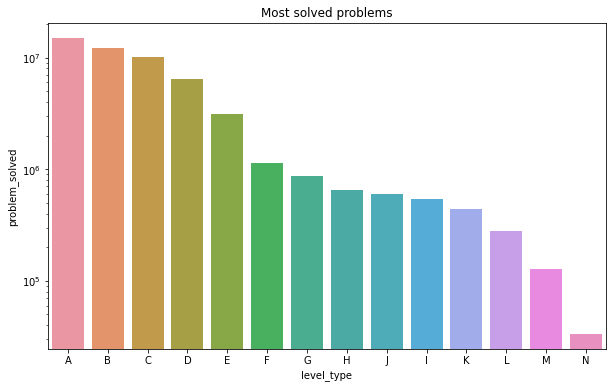

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=level_type_df['level_type'], y=level_type_df['problem_solved'])
plt.yscale("log")
plt.title('Most solved problems')

In [42]:
tags = df.tags.str.split(',')

In [43]:
tags.dropna(inplace=True)

In [44]:
tag_list = tags.explode().to_list()

In [45]:
len(set(tag_list))

36

In [46]:
def find_frequency(my_list):
  d = {}
  for item in my_list:
    if item not in d:
      d[item] = 1
    else:
      d[item] += 1
  return d

In [47]:
tag_dict = find_frequency(tag_list)

In [48]:
tag_dict

{'*special': 875,
 '2-sat': 397,
 'binary search': 11985,
 'bitmasks': 2402,
 'brute force': 26814,
 'chinese remainder theorem': 65,
 'combinatorics': 2820,
 'constructive algorithms': 17912,
 'data structures': 13024,
 'dfs and similar': 10869,
 'divide and conquer': 1301,
 'dp': 16264,
 'dsu': 3079,
 'expression parsing': 484,
 'fft': 110,
 'flows': 334,
 'games': 2597,
 'geometry': 4013,
 'graph matchings': 774,
 'graphs': 5943,
 'greedy': 27458,
 'hashing': 1639,
 'implementation': 76759,
 'math': 32230,
 'matrices': 488,
 'meet-in-the-middle': 235,
 'number theory': 7739,
 'probabilities': 1417,
 'schedules': 80,
 'shortest paths': 1798,
 'sortings': 14826,
 'string suffix structures': 378,
 'strings': 10424,
 'ternary search': 443,
 'trees': 5013,
 'two pointers': 4385}

In [49]:
tag_df = pd.DataFrame(tag_dict.items(), columns=['tag', 'count'])
tag_df.head()

,tag,count
0,strings,10424
1,implementation,76759
2,brute force,26814
3,greedy,27458
4,sortings,14826


In [50]:
tag_df.sort_values(by='count', ascending=False, inplace=True)
tag_df.head(10)

,tag,count
1,implementation,76759
6,math,32230
3,greedy,27458
2,brute force,26814
5,constructive algorithms,17912
8,dp,16264
4,sortings,14826
10,data structures,13024
16,binary search,11985
7,dfs and similar,10869


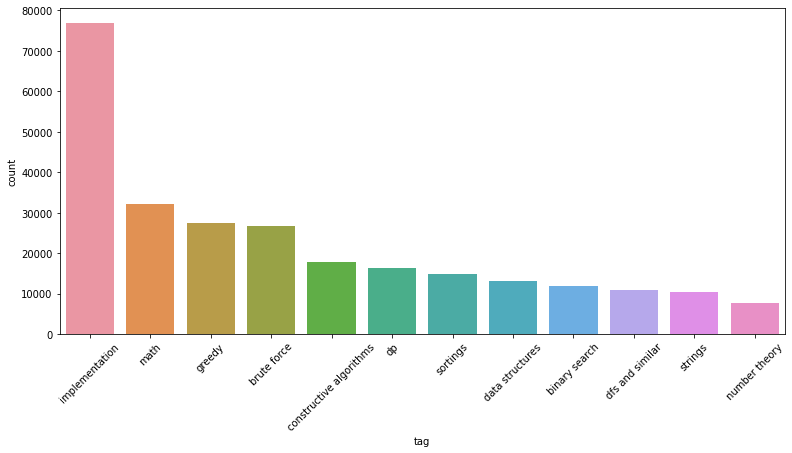

In [51]:
plt.figure(figsize=(13, 6))
sns.barplot(x=tag_df['tag'].head(12), y=tag_df['count'].head(12))
plt.xticks(rotation=45)
plt.show()

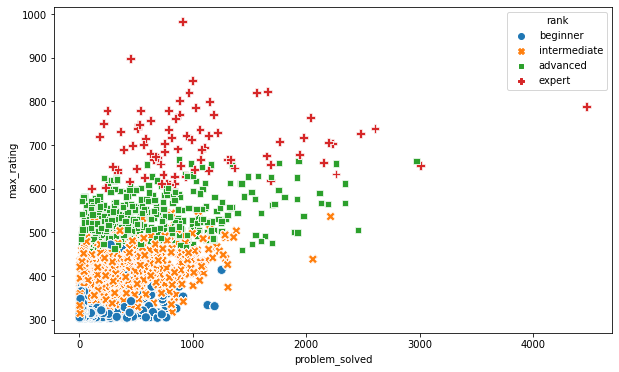

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['problem_solved'], y=df['max_rating'], hue=df['rank'], style=df['rank'], s=80)
plt.show()

In [53]:
df['rank'].unique()

array(['beginner', 'intermediate', 'advanced', 'expert'], dtype=object)

In [54]:
user_df = df[df['user_id'] == 'user_233']
user_df.head()

,user_id,problem_id,attempts_range,level_type,points,tags,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
43846,user_233,prob_5071,1,A,500.0,implementation,87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43847,user_233,prob_2605,1,A,500.0,"brute force,graphs,math",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43848,user_233,prob_2624,1,A,500.0,implementation,87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43849,user_233,prob_3465,2,A,500.0,"implementation,sortings,strings",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967
43850,user_233,prob_5781,1,A,500.0,"implementation,math",87,64,0,India,3,1505190272,321.101,255.734,beginner,1300288967


In [55]:
x_values = np.arange(0, user_df.shape[0])

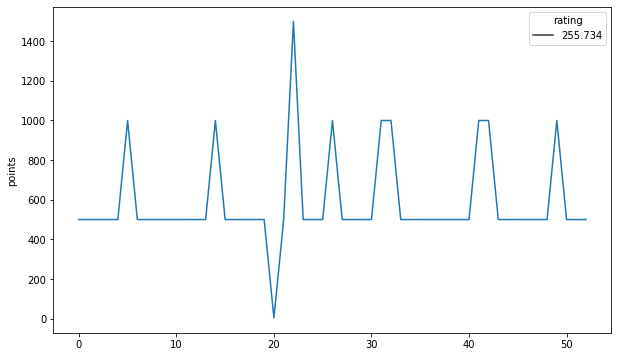

In [56]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_values, y=user_df['points'], style=user_df['rating'])

In [57]:
users_df = df['country'].value_counts().head(10)

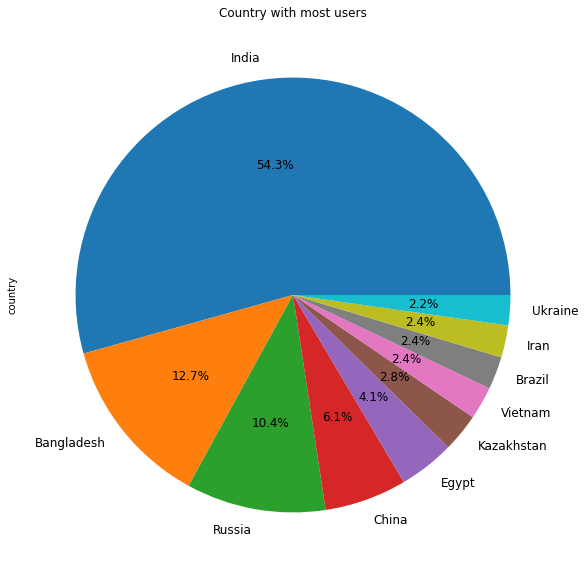

In [58]:
plt.figure(figsize=(10, 10))
plt.title('Country with most users')
users_df.plot.pie(y=df.values, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.show()

In [59]:
expert_df = df[df['rank']=='expert']

In [60]:
expert_df['country'].value_counts()

Russia         2156
China           467
Ukraine         345
India           343
Taiwan          329
Poland          314
Japan           211
South Korea     128
Belarus         108
Lithuania       100
Iran             93
Philippines      78
Romania          68
Kazakhstan       62
Croatia          52
Finland          49
Vietnam          48
Canada           44
Malaysia         44
Name: country, dtype: int64

In [61]:
exp_values = expert_df['country'].value_counts().head(10)

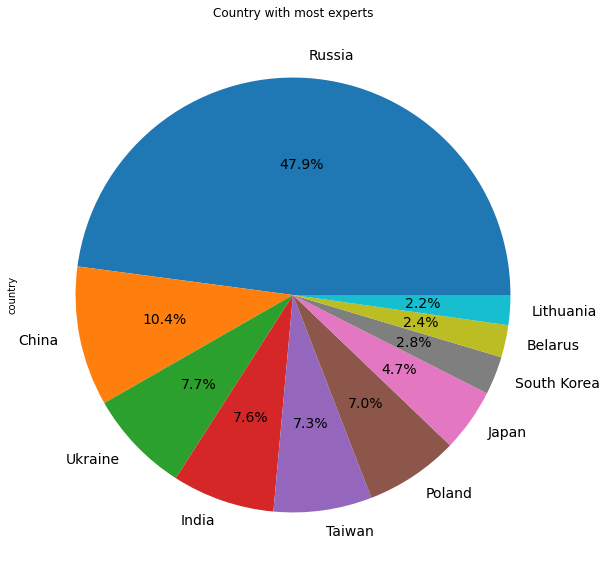

In [62]:
plt.figure(figsize=(10,10))
plt.title('Country with most experts')
exp_values.plot.pie(y=exp_values.values, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.show()

**Label Encoding**

In [63]:
df['level_type'].value_counts()

A    60336
B    40406
C    25869
D    13854
E     5757
F     1896
G     1454
H     1183
J     1015
I      955
K      759
L      480
M      227
N       58
Name: level_type, dtype: int64

In [64]:
label_encoder = preprocessing.LabelEncoder()
df['level_type']= label_encoder.fit_transform(df['level_type'])
df[['level_type']].head()

,level_type
0,1
1,0
2,0
3,2
4,0


In [65]:
df[['level_type']].tail()

,level_type
155290,1
155291,8
155292,4
155293,2
155294,0


In [66]:
df['rank']= label_encoder.fit_transform(df['rank'])
df[['rank']].head()

,rank
0,1
1,1
2,1
3,1
4,1


In [67]:
df['country']= label_encoder.fit_transform(df['country'])
df[['country']].head()

,country
0,5
1,5
2,5
3,5
4,5


**One-Hot Encoding**

In [68]:
df = pd.concat([df.drop('tags', axis=1), df.tags.str.get_dummies(sep=',').add_prefix('tag_')],1)

In [69]:
df.head()

,user_id,problem_id,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,user_232,prob_6507,1,1,1000.0,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,user_232,prob_5071,4,0,500.0,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,user_232,prob_703,2,0,500.0,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,user_232,prob_3935,1,2,1000.0,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,user_232,prob_164,2,0,500.0,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
df.shape

(154249, 51)

In [71]:
df['registration_time'] = pd.to_datetime(df['registration_time_seconds'], unit='s')
df[['registration_time']].tail()

,registration_time
155290,2015-03-20 00:29:29
155291,2010-02-01 18:05:37
155292,2010-02-01 18:05:37
155293,2010-02-01 18:05:37
155294,2017-01-12 15:08:06


In [72]:
df['last_online'] = pd.to_datetime(df['last_online_time_seconds'], unit='s')
df[['last_online']].tail()

,last_online
155290,2017-08-15 13:56:29
155291,2017-01-12 19:45:34
155292,2017-01-12 19:45:34
155293,2017-01-12 19:45:34
155294,2017-09-10 18:57:24


In [73]:
df.drop(columns=['last_online_time_seconds', 'registration_time_seconds'], axis=1, inplace=True)
df.head()

,user_id,problem_id,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers,registration_time,last_online
0,user_232,prob_6507,1,1,1000.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
1,user_232,prob_5071,4,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
2,user_232,prob_703,2,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
3,user_232,prob_3935,1,2,1000.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58
4,user_232,prob_164,2,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2015-05-20 08:35:35,2017-08-25 04:02:58


In [74]:
df.dtypes

user_id                                  object
problem_id                               object
attempts_range                            int64
level_type                                int64
points                                  float64
submission_count                          int64
problem_solved                            int64
contribution                              int64
country                                   int64
follower_count                            int64
max_rating                              float64
rating                                  float64
rank                                      int64
tag_*special                              int64
tag_2-sat                                 int64
tag_binary search                         int64
tag_bitmasks                              int64
tag_brute force                           int64
tag_chinese remainder theorem             int64
tag_combinatorics                         int64
tag_constructive algorithms             

# Descriptive Analysis

In [75]:
df.mean()

attempts_range                     1.750501
level_type                         1.402550
points                           887.097330
submission_count                 370.607168
problem_solved                   334.494959
contribution                       5.403400
country                           33.275846
follower_count                    59.866119
max_rating                       406.687068
rating                           367.743888
rank                               1.697645
tag_*special                       0.005673
tag_2-sat                          0.002574
tag_binary search                  0.077699
tag_bitmasks                       0.015572
tag_brute force                    0.173836
tag_chinese remainder theorem      0.000421
tag_combinatorics                  0.018282
tag_constructive algorithms        0.116124
tag_data structures                0.084435
tag_dfs and similar                0.070464
tag_divide and conquer             0.008434
tag_dp                          

In [76]:
df.median()

attempts_range                     1.000
level_type                         1.000
points                           500.000
submission_count                 236.000
problem_solved                   208.000
contribution                       0.000
country                           31.000
follower_count                    20.000
max_rating                       382.454
rating                           355.218
rank                               1.000
tag_*special                       0.000
tag_2-sat                          0.000
tag_binary search                  0.000
tag_bitmasks                       0.000
tag_brute force                    0.000
tag_chinese remainder theorem      0.000
tag_combinatorics                  0.000
tag_constructive algorithms        0.000
tag_data structures                0.000
tag_dfs and similar                0.000
tag_divide and conquer             0.000
tag_dp                             0.000
tag_dsu                            0.000
tag_expression p

In [77]:
df.var()

attempts_range                        1.153422
level_type                            3.466920
points                           272636.903907
submission_count                 157441.416451
problem_solved                   141333.249808
contribution                        356.595981
country                             359.734480
follower_count                    60469.410094
max_rating                         9782.603908
rating                            12418.312242
rank                                  1.456672
tag_*special                          0.005641
tag_2-sat                             0.002567
tag_binary search                     0.071662
tag_bitmasks                          0.015330
tag_brute force                       0.143618
tag_chinese remainder theorem         0.000421
tag_combinatorics                     0.017948
tag_constructive algorithms           0.102640
tag_data structures                   0.077306
tag_dfs and similar                   0.065499
tag_divide an

In [78]:
df.corr()

,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
attempts_range,1.000000,0.121232,0.155311,-0.008324,-0.008210,-0.026407,-0.009926,-0.018074,-0.048669,-0.044667,-0.002071,0.030005,0.009180,0.059875,0.008205,0.005369,0.004770,0.018861,-0.014904,0.078148,0.051132,0.019512,0.076299,0.015632,0.000082,0.015251,0.012510,-0.011591,-0.007803,0.003683,0.027154,0.025687,0.046919,-0.097583,-0.011131,0.024374,0.017897,0.034258,0.070773,-0.005844,0.017974,0.004691,0.035200,-0.024534,0.020138,0.073863,0.039230
level_type,0.121232,1.000000,0.327886,0.245495,0.244357,0.149116,0.078974,0.104047,0.316724,0.325128,-0.038066,0.073425,0.019942,0.049210,0.042213,-0.123757,0.018803,0.052494,-0.065376,0.128261,0.101133,0.031840,0.124627,0.039246,0.003061,0.035049,0.067756,-0.009483,-0.022889,-0.008898,0.047535,-0.008886,0.052439,-0.062432,-0.151956,0.041947,0.026103,-0.024058,0.047465,0.004862,0.027548,-0.025116,0.042875,-0.071519,0.013056,0.129144,0.021806
points,0.155311,0.327886,1.000000,0.106636,0.108894,0.097911,0.041679,0.063850,0.229908,0.245043,0.005056,-0.055996,0.066121,0.159071,0.111678,-0.021246,0.043460,0.113335,0.045403,0.267656,0.251939,0.094498,0.295258,0.094242,0.028337,0.054497,0.033196,0.048634,0.043042,0.002572,0.153258,0.116518,0.090737,-0.372230,-0.066739,0.057285,0.068621,0.039227,0.127090,0.022104,0.088464,0.058740,0.061821,-0.025973,0.013635,0.221700,0.083887
submission_count,-0.008324,0.245495,0.106636,1.000000,0.997868,0.438748,0.158971,0.331228,0.596070,0.545409,-0.097511,0.015703,0.019609,0.025488,0.024737,-0.019493,0.001460,0.039568,-0.043886,0.072668,0.051997,0.039375,0.061799,0.014982,-0.003912,0.027346,0.031418,0.010499,0.003555,-0.004900,0.030411,-0.028186,0.020836,-0.053548,-0.067544,0.033605,0.029306,-0.024095,0.040032,0.002434,0.022202,-0.013503,0.030620,-0.060349,0.010636,0.059413,0.019196
problem_solved,-0.008210,0.244357,0.108894,0.997868,1.000000,0.437159,0.156429,0.332613,0.595866,0.547593,-0.099197,0.015523,0.019928,0.026193,0.025349,-0.018753,0.001371,0.040443,-0.043880,0.073458,0.052577,0.039622,0.063495,0.015092,-0.003740,0.027841,0.032268,0.010194,0.003503,-0.004464,0.031046,-0.027446,0.021739,-0.055293,-0.067069,0.033602,0.030160,-0.023605,0.040332,0.002554,0.022401,-0.013273,0.031203,-0.059579,0.010761,0.060195,0.019136
contribution,-0.026407,0.149116,0.097911,0.438748,0.437159,1.000000,0.149839,0.479894,0.546372,0.483560,-0.081153,0.036035,0.016512,0.020737,0.023442,-0.014178,0.009146,0.030189,-0.023126,0.052863,0.042602,0.031415,0.046673,0.017278,-0.003494,0.036571,0.034826,0.009282,0.003826,0.006850,0.033885,-0.017204,0.011739,-0.054253,-0.032076,0.030317,0.023715,-0.005267,0.025374,-0.000230,0.031015,-0.008746,0.018592,-0.037473,0.005538,0.040410,0.005729
country,-0.009926,0.078974,0.041679,0.158971,0.156429,0.149839,1.000000,0.002582,0.272475,0.265407,-0.026381,0.018672,0.010022,0.018383,0.009509,-0.009772,0.005964,0.005218,-0.005863,0.020942,0.027733,0.015572,0.020854,0.013010,-0.001941,0.005322,0.011184,-0.000910,0.000200,0.001400,0.019712,0.002860,0.006780,-0.024117,-0.019569,0.011342,0.008187,-0.006089,0.002465,-0.001968,0.010984,-0.005005,0.002701,-0.017555,0.004508,0.011950,0.006006
follower_count,-0.018074,0.104047,0.063850,0.331228,0.332613,0.479894,0.002582,1.000000,0.396125,0.346171,-0.039510,0.012403,0.013070,0.011596,0.013104,-0.010294,0.015787,0.

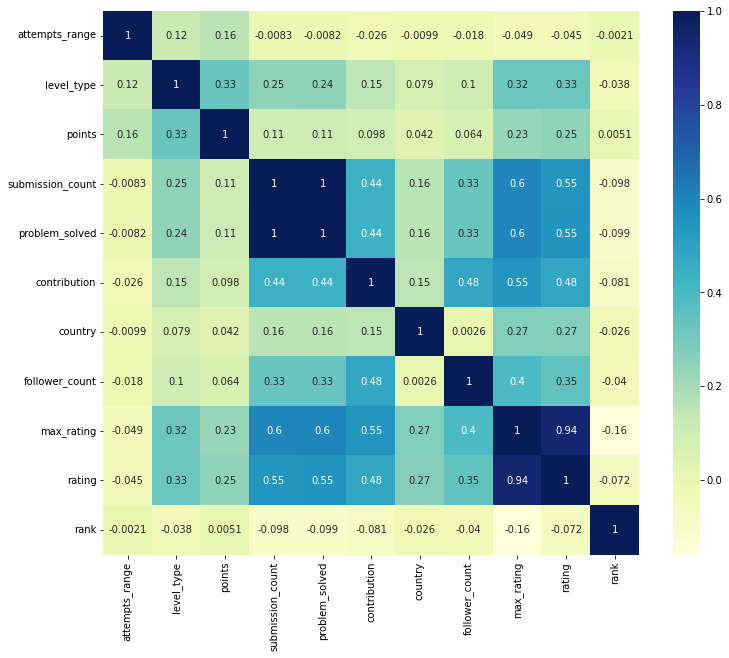

In [79]:
fig, ax = plt.subplots(figsize=(12,10)) 
heatmap_df=df.select_dtypes(exclude=['object'])
heatmap_df=heatmap_df.iloc[:,0:11]
# heatmap_df.head()
sns.heatmap(heatmap_df.corr(), annot=True, cmap='YlGnBu', ax=ax)

In [80]:
df.std()

attempts_range                     1.073975
level_type                         1.861967
points                           522.146439
submission_count                 396.788881
problem_solved                   375.943147
contribution                      18.883749
country                           18.966668
follower_count                   245.905287
max_rating                        98.907047
rating                           111.437481
rank                               1.206927
tag_*special                       0.075103
tag_2-sat                          0.050667
tag_binary search                  0.267698
tag_bitmasks                       0.123814
tag_brute force                    0.378969
tag_chinese remainder theorem      0.020524
tag_combinatorics                  0.133970
tag_constructive algorithms        0.320375
tag_data structures                0.278040
tag_dfs and similar                0.255928
tag_divide and conquer             0.091451
tag_dp                          

In [81]:
df.skew()

attempts_range                    1.915188
level_type                        2.427905
points                            1.248408
submission_count                  2.837701
problem_solved                    3.017744
contribution                      4.492542
country                           0.551704
follower_count                   30.905768
max_rating                        1.356209
rating                            0.617473
rank                             -0.065370
tag_*special                     13.164104
tag_2-sat                        19.635341
tag_binary search                 3.155093
tag_bitmasks                      7.825210
tag_brute force                   1.721344
tag_chinese remainder theorem    48.683756
tag_combinatorics                 7.191513
tag_constructive algorithms       2.396452
tag_data structures               2.989287
tag_dfs and similar               3.356735
tag_divide and conquer           10.750471
tag_dp                            2.569450
tag_dsu    

In [82]:
df.kurt()

attempts_range                      4.004866
level_type                          7.810169
points                              0.730704
submission_count                   13.473733
problem_solved                     15.392129
contribution                       23.802643
country                            -0.112283
follower_count                   1265.690854
max_rating                          2.202784
rating                              0.823675
rank                               -1.621636
tag_*special                      171.295868
tag_2-sat                         383.551576
tag_binary search                   7.954713
tag_bitmasks                       59.234680
tag_brute force                     0.963038
tag_chinese remainder theorem    2368.138762
tag_combinatorics                  49.718500
tag_constructive algorithms         3.743030
tag_data structures                 6.935928
tag_dfs and similar                 9.267791
tag_divide and conquer            113.574102
tag_dp    

# Feature Selection

In [83]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(df.select_dtypes(exclude=['object', 'datetime']))

VarianceThreshold(threshold=0)

In [84]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [85]:
df.select_dtypes(exclude=['object', 'datetime']).columns[var_threshold.get_support()]

Index(['attempts_range', 'level_type', 'points', 'submission_count',
       'problem_solved', 'contribution', 'country', 'follower_count',
       'max_rating', 'rating', 'rank', 'tag_*special', 'tag_2-sat',
       'tag_binary search', 'tag_bitmasks', 'tag_brute force',
       'tag_chinese remainder theorem', 'tag_combinatorics',
       'tag_constructive algorithms', 'tag_data structures',
       'tag_dfs and similar', 'tag_divide and conquer', 'tag_dp', 'tag_dsu',
       'tag_expression parsing', 'tag_fft', 'tag_flows', 'tag_games',
       'tag_geometry', 'tag_graph matchings', 'tag_graphs', 'tag_greedy',
       'tag_hashing', 'tag_implementation', 'tag_math', 'tag_matrices',
       'tag_meet-in-the-middle', 'tag_number theory', 'tag_probabilities',
       'tag_schedules', 'tag_shortest paths', 'tag_sortings',
       'tag_string suffix structures', 'tag_strings', 'tag_ternary search',
       'tag_trees', 'tag_two pointers'],
      dtype='object')

# Train Test Split

In [86]:
X = df.drop('attempts_range', axis=1)
y = df['attempts_range']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Length of X_train is %s" % (len(X_train)))
print("Length of X_test is %s" % (len(X_test)))
print("Length of Y_train is %s" % (len(y_train)))
print("Length of Y_test is %s" % (len(y_test)))

Length of X_train is 107974
Length of X_test is 46275
Length of Y_train is 107974
Length of Y_test is 46275


In [88]:
X_train = X_train.select_dtypes(exclude=['object', 'datetime'])
X_test = X_test.select_dtypes(exclude=['object', 'datetime'])

# SMOTE Analysis

In [89]:
#SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({1: 57634, 2: 32912, 3: 9867, 4: 3785, 6: 2076, 5: 1700})
Resample dataset shape Counter({1: 57634, 2: 57634, 3: 57634, 4: 57634, 5: 57634, 6: 57634})


In [90]:
print("Length of X_train is %s" % (len(X_train)))
print("Length of X_test is %s" % (len(X_test)))
print("Length of Y_train is %s" % (len(y_train)))
print("Length of Y_test is %s" % (len(y_test)))

Length of X_train is 107974
Length of X_test is 46275
Length of Y_train is 107974
Length of Y_test is 46275


In [91]:
print("Length of X_smote is %s" % (len(x_smote)))
print("Length of y_smote is %s" % (len(y_smote)))

Length of X_smote is 345804
Length of y_smote is 345804


In [92]:
x_smote.head()

,level_type,points,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,8,500.0,349,298,0,6,17,389.908,360.378,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1500.0,96,87,0,31,32,506.881,499.427,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1000.0,113,86,0,5,33,307.339,245.986,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,500.0,438,331,0,33,9,371.273,354.931,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,500.0,1251,1126,1,73,28,523.796,459.862,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


**Under Sampling**

In [93]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2, replacement=True)# fit predictor and target variable

X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({1: 57634, 2: 32912, 3: 9867, 4: 3785, 6: 2076, 5: 1700})
Resample dataset shape Counter({1: 1700, 2: 1700, 3: 1700, 4: 1700, 5: 1700, 6: 1700})


**Over Sampling**

In [94]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2)

X_ros, y_ros = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({1: 57634, 2: 32912, 3: 9867, 4: 3785, 6: 2076, 5: 1700})
Resample dataset shape Counter({1: 57634, 2: 57634, 3: 57634, 4: 57634, 5: 57634, 6: 57634})


# Creating Models

In [95]:
model=[]
accuracy=[]

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_train,y_train)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
model.append('Logistic Regression')
accuracy.append(x*100)
print(classification_report(y_test, predicted_values))
print("Logistic Regression's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           1       0.54      0.98      0.70     24846
           2       0.35      0.04      0.07     14053
           3       0.00      0.00      0.00      4114
           4       0.00      0.00      0.00      1631
           5       0.00      0.00      0.00       746
           6       0.00      0.00      0.00       885

    accuracy                           0.54     46275
   macro avg       0.15      0.17      0.13     46275
weighted avg       0.40      0.54      0.40     46275

Logistic Regression's Accuracy is:  53.70934629929768


**The accuracy for X_train and y_train is 53.7%. The precisions for 3, 4, 5, 6 are very low because of imbalanced data**

**Cross Validations**

In [97]:
score_LR = cross_val_score(LogReg, X.select_dtypes(exclude=['object', 'datetime']), y, cv=5)
score_LR

array([0.53448947, 0.53406807, 0.53640194, 0.53235008, 0.53353431])

In [98]:
score_LR.mean()

0.5341687749388155

**Under Sampling data**

In [99]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_rus,y_rus)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print(classification_report(y_test, predicted_values))
print("Logistic Regression's Accuracy using Under Sampling values is: ", x*100)

              precision    recall  f1-score   support

           1       0.59      0.58      0.59     24846
           2       0.29      0.11      0.16     14053
           3       0.08      0.01      0.01      4114
           4       0.04      0.09      0.05      1631
           5       0.03      0.19      0.05       746
           6       0.03      0.28      0.06       885

    accuracy                           0.36     46275
   macro avg       0.18      0.21      0.15     46275
weighted avg       0.42      0.36      0.37     46275

Logistic Regression's Accuracy using Under Sampling values is:  35.73419773095624


**Over Sampling data**

In [100]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(X_ros,y_ros)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print(classification_report(y_test, predicted_values))
print("Logistic Regression's Accuracy using Over Sampling values is: ", x*100)

              precision    recall  f1-score   support

           1       0.60      0.63      0.61     24846
           2       0.31      0.04      0.07     14053
           3       0.09      0.05      0.06      4114
           4       0.04      0.11      0.06      1631
           5       0.03      0.07      0.04       746
           6       0.03      0.38      0.06       885

    accuracy                           0.37     46275
   macro avg       0.18      0.21      0.15     46275
weighted avg       0.43      0.37      0.36     46275

Logistic Regression's Accuracy using Over Sampling values is:  36.659103187466236


**SMOTE data**

In [101]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(x_smote,y_smote)
predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print(classification_report(y_test, predicted_values))
print("Logistic Regression's Accuracy using SMOTE is: ", x*100)

              precision    recall  f1-score   support

           1       0.60      0.64      0.62     24846
           2       0.30      0.05      0.08     14053
           3       0.09      0.04      0.05      4114
           4       0.04      0.04      0.04      1631
           5       0.03      0.16      0.04       746
           6       0.03      0.37      0.06       885

    accuracy                           0.37     46275
   macro avg       0.18      0.21      0.15     46275
weighted avg       0.42      0.37      0.36     46275

Logistic Regression's Accuracy using SMOTE is:  37.27498649378715


**The accuracy for X_smote and y_smote is 37.2%. The precisions for 3, 4, 5, 6 are balanced here by the accuracy is very low compared to the imbalances LogisticRegression.**

*SMOTE uses KNN algorithm to get the artificial rows so it balances the dataset yet, this dataset consists of competitive programmers who in real-life will be imbalanced*

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, random_state=0)
RF.fit(X_train,y_train)
predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
accuracy.append(x*100)
model.append('Random Forest')
print(classification_report(y_test,predicted_values))
print("RF's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           1       0.59      0.76      0.66     24846
           2       0.35      0.29      0.32     14053
           3       0.15      0.05      0.07      4114
           4       0.07      0.02      0.03      1631
           5       0.04      0.01      0.02       746
           6       0.14      0.04      0.06       885

    accuracy                           0.50     46275
   macro avg       0.22      0.19      0.19     46275
weighted avg       0.44      0.50      0.46     46275

RF's Accuracy is:  50.37277147487844


In [103]:
score_RF = cross_val_score(RF, X.select_dtypes(exclude=['object', 'datetime']), y, cv=5)
score_RF

array([0.52687196, 0.50703404, 0.49024311, 0.48508914, 0.47936724])

In [104]:
score_RF.mean()

0.49772109800480013

In [105]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_smote,y_smote)
predicted_values = RF.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print(classification_report(y_test,predicted_values))
print("RF's Accuracy using SMOTE values is: ", x*100)

              precision    recall  f1-score   support

           1       0.60      0.64      0.62     24846
           2       0.34      0.33      0.33     14053
           3       0.12      0.11      0.11      4114
           4       0.06      0.05      0.06      1631
           5       0.04      0.03      0.04       746
           6       0.10      0.09      0.09       885

    accuracy                           0.46     46275
   macro avg       0.21      0.21      0.21     46275
weighted avg       0.44      0.46      0.45     46275

RF's Accuracy using SMOTE values is:  45.5602377093463


## K- Nearest Neighbors

In [106]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
predicted_values = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
accuracy.append(x*100)
model.append('K-Nearest Neighbors')
print(classification_report(y_test,predicted_values))
print("KNN's Accuracy is: ", x*100)

              precision    recall  f1-score   support

           1       0.56      0.81      0.66     24846
           2       0.33      0.22      0.27     14053
           3       0.13      0.02      0.04      4114
           4       0.08      0.00      0.01      1631
           5       0.00      0.00      0.00       746
           6       0.13      0.00      0.01       885

    accuracy                           0.51     46275
   macro avg       0.21      0.18      0.16     46275
weighted avg       0.42      0.51      0.44     46275

KNN's Accuracy is:  50.61480280929227


In [107]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_smote, y_smote)
predicted_values = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
print(classification_report(y_test,predicted_values))
print("KNN's Accuracy using SMOTE values is: ", x*100)

              precision    recall  f1-score   support

           1       0.61      0.50      0.55     24846
           2       0.32      0.31      0.32     14053
           3       0.11      0.15      0.13      4114
           4       0.05      0.09      0.06      1631
           5       0.03      0.07      0.05       746
           6       0.06      0.11      0.07       885

    accuracy                           0.38     46275
   macro avg       0.20      0.21      0.20     46275
weighted avg       0.44      0.38      0.41     46275

KNN's Accuracy using SMOTE values is:  38.331712587790385


**Model Comparision**

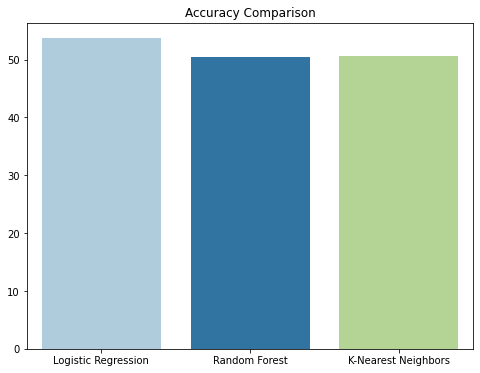

In [108]:
plt.figure(figsize=(8,6))
plt.title('Accuracy Comparison')
sns.barplot(x=model, y=accuracy, palette='Paired')

#Hypothesis Testing

In [109]:
df1 = df.select_dtypes(exclude=['object', 'datetime'])
df1.head()

,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
0,1,1,1000.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,4,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,1000.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,0,500.0,53,47,0,5,1,307.913,206.709,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
sample_df = df1.sample(500)
sample_df

,attempts_range,level_type,points,submission_count,problem_solved,contribution,country,follower_count,max_rating,rating,rank,tag_*special,tag_2-sat,tag_binary search,tag_bitmasks,tag_brute force,tag_chinese remainder theorem,tag_combinatorics,tag_constructive algorithms,tag_data structures,tag_dfs and similar,tag_divide and conquer,tag_dp,tag_dsu,tag_expression parsing,tag_fft,tag_flows,tag_games,tag_geometry,tag_graph matchings,tag_graphs,tag_greedy,tag_hashing,tag_implementation,tag_math,tag_matrices,tag_meet-in-the-middle,tag_number theory,tag_probabilities,tag_schedules,tag_shortest paths,tag_sortings,tag_string suffix structures,tag_strings,tag_ternary search,tag_trees,tag_two pointers
97278,1,0,500.0,89,72,0,5,21,315.940,182.339,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
64584,1,3,500.0,2055,1979,94,57,273,717.890,652.236,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
151694,1,0,500.0,288,259,0,31,11,313.647,239.106,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
73387,1,1,1000.0,265,235,1,14,32,472.764,452.982,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11521,1,2,500.0,166,156,0,31,6,343.463,293.005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24523,3,0,500.0,56,41,-6,31,4,308.200,282.683,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
34075,1,1,750.0,70,57,0,31,11,309.346,277.810,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
132215,2,2,1500.0,216,194,0,31,23,341.743,295.872,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
28332,6,1,1000.0,169,155,0,31,6,311.927,243.119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [111]:
population_mean = df1['problem_solved'].mean()
print("Population Mean :", population_mean)
population_std = df1['problem_solved'].std()
print("Population Standard Deviation :", population_std)
population_var = df1['problem_solved'].var()
print("Population Variance :", population_var)

Population Mean : 334.49495944868363
Population Standard Deviation : 375.9431470417436
Population Variance : 141333.24980765005


In [112]:
sample_mean = sample_df['problem_solved'].mean()
print("Sample Mean :", sample_mean)
sample_std = sample_df['problem_solved'].std()
print("Sample Standard Deviation :", sample_std)
sample_var = sample_df['problem_solved'].var()
print("Sample Variance :", sample_var)

Sample Mean : 344.174
Sample Standard Deviation : 412.3215466594967
Sample Variance : 170009.0578396795


## Z-test

**A coding expert believes that the mean of the problems solved is greater than the average problems solved, which is 334.4. Assume the population standard deviation is 375.9. A random sample of 500 problems is selected, and the mean of the sample is 336.7. At α = 0.05, is there enough evidence to reject the claim?**

In [113]:
#H0 : μ = 334.4, Ha :  μ > 334.4
n = 500
xbar = 336.7
mu = 334.4
sigma = 375.9
alpha = 0.05

In [114]:
Z_critical = abs(st.norm.ppf(alpha))
Z_critical

1.6448536269514729

In [115]:
z=(xbar-mu)/(sigma/np.sqrt(n))
z

0.13681714148043475

In [116]:
if (z < Z_critical): #Right-tailed test
    print("Accept Null hypothesis")
else:
    print("Reject Null hypothesis")

Accept Null hypothesis


## Z-Test using P-value

**A coding expert believes that the mean of the problems solved is greater than the average problems solved, which is 334.4. Assume the population standard deviation is 375.9. A random sample of 500 problems is selected, and the mean of the sample is 336.7. At α = 0.05, is there enough evidence to reject the claim? Use P-value method**

In [117]:
#H0 : μ = 334.4, Ha :  μ > 334.4
n = 500
xbar = 336.7
mu = 334.4
sigma = 375.9
alpha = 0.05

In [118]:
z=(xbar-mu)/(sigma/np.sqrt(n))
z

0.13681714148043475

In [119]:
p_val=(1-st.norm.cdf(z))*2
p_val

0.891175334116848

In [120]:
if (p_val>alpha):
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Accept Null hypothesis


## t-Test

In [121]:
population_mean = df1['submission_count'].mean()
print("Population Mean :", population_mean)
population_std = df1['submission_count'].std()
print("Population Standard Deviation :", population_std)
population_var = df1['submission_count'].var()
print("Population Variance :", population_var)

Population Mean : 370.60716763155676
Population Standard Deviation : 396.7888814607207
Population Variance : 157441.41645084985


In [122]:
sample_mean = sample_df['submission_count'].mean()
print("Sample Mean :", sample_mean)
sample_std = sample_df['submission_count'].std()
print("Sample Standard Deviation :", sample_std)
sample_var = sample_df['submission_count'].var()
print("Sample Variance :", sample_var)

Sample Mean : 377.876
Sample Standard Deviation : 429.0192392414105
Sample Variance : 184057.50763927863


**An online coding platform claims that the average submissions is 370.6. A random sample of 500 problems had a mean submission of 373.1. The sample standard deviation is 384.0. Is there enough evidence to reject the coding platform’s claim at α = 0.05? Assume the variable is normally distributed.**

In [123]:
#H0 : μ = 370.6 Ha : μ != 370.6
n = 500
degrees_of_freedom = n-1
xbar = 373.1
mu = 370.6
s = 384
alpha = 0.05

In [124]:
t = (xbar-mu)/(s/np.sqrt(n))
t

0.14557734228514257

In [125]:
t_critical = abs(st.t.ppf(alpha/2, degrees_of_freedom))
t_critical

1.9647293909876653

In [126]:
if (t>t_critical): 
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Reject null hypothesis


## t-Test using P-value

**An online coding platform claims that average submissions is greater than the average of submissions for all problems. A random sample of 500 problems has a mean of 373.1 and a standard deviation of 384. If the average submissions of all problems is 370.6, is there enough evidence to support the coding platform's claim at α = 0.05? Use P-value method**

In [127]:
#H0 : μ = 370.6 Ha : mu > 370.6
n = 500
degrees_of_freedom = n-1
xbar = 373.1
mu = 370.6
s = 384
alpha = 0.05

In [128]:
t = (xbar-mu)/(s/np.sqrt(n))
t

0.14557734228514257

In [129]:
p_val = (1-st.t.cdf(abs(t), degrees_of_freedom))
p_val

0.44215692044895305

In [130]:
if (p_val>alpha):
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Accept Null hypothesis


## Chi-Square Test

In [131]:
population_mean = df1['attempts_range'].mean()
print("Population Mean :", population_mean)
population_std = df1['attempts_range'].std()
print("Population Standard Deviation :", population_std)
population_var = df1['attempts_range'].var()
print("Population Variance :", population_var)

Population Mean : 1.7505008136195372
Population Standard Deviation : 1.0739748212746787
Population Variance : 1.1534219167319781


In [132]:
sample_mean = sample_df['attempts_range'].mean()
print("Sample Mean :", sample_mean)
sample_std = sample_df['attempts_range'].std()
print("Sample Standard Deviation :", sample_std)
sample_var = sample_df['attempts_range'].var()
print("Sample Variance :", sample_var)

Sample Mean : 1.646
Sample Standard Deviation : 0.991286688399073
Sample Variance : 0.9826492985972008


**Competitive Programmer wishes to see if the variance of attempts taken of 500 problems is less than the variance of the population, which is 1.15. The variance of the attempts taken of 500 problems was 1.2. Test the claim at α = 0.05**

In [133]:
#H0 : σ2 =1.15 Ha : sigma_sq < 1.15
n = 500
degrees_of_freedom = n-1
s_square = 1.2
sigma_square = 1.15
alpha = 0.05

In [134]:
chi_square = ((n-1)*s_square)/sigma_square
chi_square

520.695652173913

In [135]:
chi_square_critical = st.chi2.ppf(alpha, degrees_of_freedom)
chi_square_critical

448.19882158627

In [136]:
if (chi_square > chi_square_critical):
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Accept Null hypothesis


## Chi-Square Test using P-Value

**Competitive Programmer knows that the standard deviation of the attempts taken to solve a problem is 1.07. A random sample of 500 problems is selected and the standard deviation 1.09. At α = 0.05, can it be concluded that the standard deviation has changed? Use the P-value method.**

In [137]:
#H0 : σ = 1.07  Ha : sigma != 1.07
n = 500
degrees_of_freedom = n-1
s = 1.05
sigma = 1.07
alpha = 0.05

In [138]:
chi_square = ((n-1)*(s**2))/sigma**2
chi_square

480.5201327626867

In [139]:
p_val = st.chi2.cdf(chi_square, degrees_of_freedom)*2
p_val

0.5678773134529609

In [140]:
if (p_val>alpha):
    print("Accept Null hypothesis")
else:
    print("Reject null hypothesis")

Accept Null hypothesis
